# Import Path

In [1]:
import os
import sys

p = os.path.abspath('../')
if p not in sys.path:
    print('Adding {} path to system'.format(p))
    sys.path.append(p)

Adding C:\Cerebral\_MarioSandBox\Python\projectPage_myOntarioCovidModelTrendAnalysis\git_projectCodes\myOntarioCovidModelTrendAnalysis path to system


The [Epidemiological Data from the COVID-19 Outbreak in Canada](https://github.com/ishaberry/Covid19Canada) located in github.



In [2]:
from myFunctions.covid import covid as cvd

In [3]:
import pandas as pd
import numpy as np

# Get Data

In [4]:
covidObject = cvd(cached=True)

Getting COVID data
cached


In [21]:
covidObject.getProcessedData('BC')

In [22]:
# convert dictionary into dataframe
dfData = pd.DataFrame.from_dict(covidObject.dataProcess)
# convert date col to datetime pandas series
dfData['date'] = pd.to_datetime(dfData['date'])
# convert index to dates
dfData = dfData.set_index('date')

In [23]:
dfData.tail()

,contracted,mortality,recovered,testing
date,,,,
2020-04-19,1647,81,987,60668
2020-04-20,1699,86,1039,64375
2020-04-21,1724,87,1041,65545
2020-04-22,1795,90,1079,66977
2020-04-23,1824,94,1092,68553


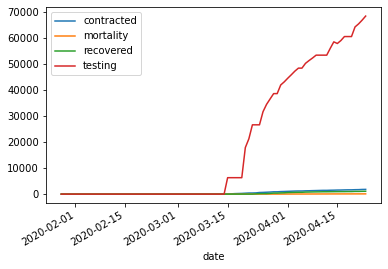

In [24]:
dfData.plot()

# Modeling Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import MinMaxScaler

Recall that the logistic regression is in the form:

$$ p = \frac{1}{1+e^{-(b_o+b_1x)}}$$

To make coding simpler to follow let us make the parameters or weights be equivalent to the following equation:
$$ p = \frac{a}{1+e^{-(c+dx)}}$$
which if we remove a consant c we get the equation:
$$ p = \frac{a}{1+e^{-c(x-d)}}$$

Notice that d is not cd here because it is just a constant and if we multiply, divide, add or subtract a constant it is still a constant in the end.

In [26]:
def logistic(x, a, c, d):
    """Fit a logistic function."""
    return a / (1. + np.exp(-c * (x - d)))

In [27]:
def fit_predict(x, y, f, x_pred=None):
    """Fit a function and predict on some input"""
    popt, pcov = opt.curve_fit(f, x, y, maxfev=100000)
    if x_pred is None:
        x_pred = x
    return f(x_pred, *popt)

### Data

In [28]:
y = dfData['contracted'].to_numpy()
x = np.arange(len(y))

### Massaging the independent variable

In [29]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74])

In [30]:
lenPred = 30
xFuture = np.arange(lenPred) + len(x)

### Massaging the dependent variable

In [31]:
m = MinMaxScaler()
yTrans = m.fit_transform(y.reshape(-1, 1) )
yTrans = yTrans.reshape(1, -1)[0]

In [32]:
yPredLogReg = fit_predict(
                x, yTrans, logistic, x_pred=xFuture).reshape(-1, 1)

In [33]:
yPredLogReg = m.inverse_transform(yPredLogReg).reshape(1, -1)[0]

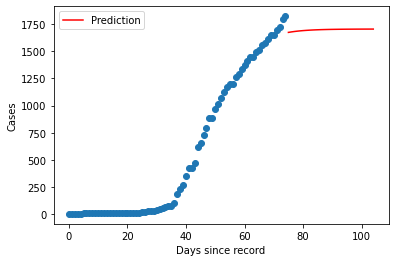

In [34]:
### Plot
plt.scatter(x, y)
#plt.plot(x, Y_pred_weighted,label='Weighted')
plt.plot(xFuture, yPredLogReg,'r',label='Prediction')
plt.xlabel('Days since record')
plt.ylabel('Cases')
plt.legend()

plt.show()

In [35]:
cur = 0
prev = 0
delta = 0

for xVal,yVal in zip(xFuture,yPredLogReg):
    prev = cur
    cur = yVal
    print('Day from now={} CumSum={} Delta={}'.format(xVal,
                                                     yVal,
                                                     np.abs(cur-prev)))
    
    

Day from now=75 CumSum=1675.038145904232 Delta=1675.038145904232
Day from now=76 CumSum=1679.3843585161276 Delta=4.34621261189568
Day from now=77 CumSum=1683.128680260439 Delta=3.744321744311492
Day from now=78 CumSum=1686.3522773523052 Delta=3.223597091866168
Day from now=79 CumSum=1689.1259468556661 Delta=2.7736695033609067
Day from now=80 CumSum=1691.5112875685045 Delta=2.3853407128383424
Day from now=81 CumSum=1693.5617812357075 Delta=2.050493667203
Day from now=82 CumSum=1695.323777931958 Delta=1.761996696250435
Day from now=83 CumSum=1696.8373848058582 Delta=1.513606873900244
Day from now=84 CumSum=1698.137260972066 Delta=1.2998761662079232
Day from now=85 CumSum=1699.253323625328 Delta=1.1160626532619062
Day from now=86 CumSum=1700.2113717817954 Delta=0.9580481564673846
Day from now=87 CumSum=1701.03363470297 Delta=0.8222629211745698
Day from now=88 CumSum=1701.7392522346054 Delta=0.7056175316354256
Day from now=89 CumSum=1702.3446941529298 Delta=0.605441918324459
Day from now=9